# Clase 5: Introducción a la Ciencia de Datos

## 1. Limpieza de los datos (_data cleaning_)

En los casos de la vida real, los datos tendrán inconvenientes: valores perdidos, errores ortográficos, errores de digitación, valores atípicos, entre otros. Un buen análisis de datos (y incluso un buen modelo de Machine Learning) necesitan de una base de datos limpia, coherente y manejable. En otras palabras, _bien comportada_.

Sin embargo, ello requiere de un proceso de observar, corregir y adaptar la base de datos a nuestras necesidades. En esta clase, recorreremos algunas de las buenas prácticas para la limpieza de datos. No obstante, primero debemos importar los datos:

## 1.1. Importe de los datos

Para importar los datos, podemos utilizar diferentes métodos dependiendo del formato:

* Excel: `pandas.read_excel()`
* CSV: `pandas.read_csv()`
* DTA: `pandas.read_stata()`
* RData: `pyreadr.read_r`

Cada uno de ellos tiene sus propias opciones, por lo cual siempre es recomendable leer un poco sobre el método antes. Por ahora, tendremos un pequeño ejemplo con una archivo .csv sobre información sobre marketing:

In [1]:
import pandas as pd

# Importando los datos
data = pd.read_csv("Marketing_Analysis.csv")
data.head()

/Users/nbp/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (0,1,2,3,11,14,15,16) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,banking marketing,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,customer id and age.,NaN,Customer salary and balance.,NaN,Customer marital status and job with education...,NaN,particular customer before targeted or not,NaN,Loan types: loans or housing loans,NaN,Contact type,NaN,month of contact,duration of call,NaN,NaN,NaN,outcome of previous contact,response of customer after call happned
1,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
2,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
3,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
4,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no


Como podemos observar, las columnas no tienen los nombres que necesitamos. En ese sentido, debemos decirle a Python cómo queremos que lea los datos. En este caso, vamos a decirle que se salte dos columnas (la primera está vacía y la segunda es la explicacion de la columna):

In [2]:
# Importando los datos
data = pd.read_csv("Marketing_Analysis.csv", skiprows = 2)
data.head(10)

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no
5,6,35.0,100000,231,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",139 sec,1,-1,0,unknown,no
6,7,28.0,100000,447,single,"management,tertiary",no,no,yes,yes,unknown,5,"may, 2017",217 sec,1,-1,0,unknown,no
7,8,42.0,120000,2,divorced,"entrepreneur,tertiary",no,yes,yes,no,unknown,5,"may, 2017",380 sec,1,-1,0,unknown,no
8,9,58.0,55000,121,married,"retired,primary",yes,no,yes,no,unknown,5,"may, 2017",50 sec,1,-1,0,unknown,no
9,10,43.0,60000,593,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",55 sec,1,-1,0,unknown,no


Ahora echemos un vistazo a la base de datos: es una base de datos sobre consumidores. Pero, ¿qué datos tenemos? Tenemos dos tipos:

* **Datos sociodemográficos:** la edad, salario, balance de dinero, estado marital, educación y trabajo,
* **Datos financieros:** salario, si tiene un préstamo o no, si tiene casa o no.
* **Datos internos de la empresa y campaña de marketing:** día, mes y año de contacto, si estuvo o no seleccionado para la campaña, si se aplicó o no la campaña y duración de la llamada.

Es importante ver qué tipos de datos tenemos para saber a qué nos enfrentamos, qué datos hacen falta para nuestro objetivo, comportamientos atípicos, entre otros.

Por ahora, veamos qué tamaño tiene la base de datos:

In [3]:
# Dimensiones de la base de datos
data.shape

(45211, 19)

Esto nos dice que la base de datos tiene 19 columnas y 45211 filas. En otras palabras, tenemos 19 variables y 45211 consumidores (observaciones) en nuestra base de datos. 

## 1.2. Valores perdidos (_missings_)

Los valores perdidos pueden ser un problema o una solución. En algunos casos, los valores perdidos pueden afectar los análisis descriptivos e inferenciales que podamos hacer. En ese sentido, primero debe hacerse algo con ellos, de tal manera que minimicemos su impacto.

Algunas de las estrategias más importantes para tratar los valores perdidos son:

* **Eliminación:** se eliminan las filas y/o columnas que tengan los valores perdidos.
* **Imputación:** se reemplaza el valor perdido por algún valor que tenga sentido. Hay tres formas básicas de hacerlo:
    - Reemplazarlo por la moda, media o mediana.
    - Reemplazarlo por un valor predicho por un algoritmo de Machine Learning.
    
Miremos nuestra base de datos:

In [4]:
# Suma de los valores perdidos por variable
data.isnull().sum()

customerid     0
age           20
salary         0
balance        0
marital        0
jobedu         0
targeted       0
default        0
housing        0
loan           0
contact        0
day            0
month         50
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
response      30
dtype: int64

Podemos observar que las variables `age`, `month` y `response` tienen problemas de valores perdidos (_missings_). Miremos cada una de ellas por separado:

In [5]:
data[data.age.isnull()].head(15)

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
161,162,NaN,60000,47,single,"technician,tertiary",no,no,yes,no,unknown,5,"may, 2017",181 sec,1,-1,0,unknown,no
1021,1022,NaN,60000,-500,married,"technician,secondary",yes,no,yes,no,unknown,7,"may, 2017",78 sec,5,-1,0,unknown,no
1585,1586,NaN,100000,123,divorced,"management,secondary",yes,no,no,no,unknown,8,"may, 2017",306 sec,2,-1,0,unknown,no
3943,3944,NaN,70000,62,married,"services,tertiary",yes,no,yes,yes,unknown,16,"may, 2017",280 sec,2,-1,0,unknown,no
5675,5676,NaN,20000,-85,married,"blue-collar,primary",yes,no,yes,yes,unknown,26,"may, 2017",118 sec,1,-1,0,unknown,no
6873,6874,NaN,70000,1336,divorced,"services,secondary",yes,no,yes,no,unknown,28,"may, 2017",298 sec,5,-1,0,unknown,no
9692,9693,NaN,50000,-162,single,"admin.,tertiary",no,no,yes,yes,unknown,6,"jun, 2017",119 sec,1,-1,0,unknown,no
11653,11654,NaN,8000,2562,single,"unemployed,primary",yes,no,no,no,unknown,20,"jun, 2017",489 sec,2,-1,0,unknown,no
13417,13418,NaN,20000,452,divorced,"blue-collar,primary",yes,no,yes,no,cellular,9,"jul, 2017",96 sec,1,-1,0,unknown,no
14541,14542,NaN,20000,-84,married,"blue-collar,secondary",yes,no,no,yes,cellular,15,"jul, 2017",1.25 min,4,-1,0,unknown,no


Aunque podemos ver cuáles casos son, necesitamos más información para saber qué hacer. Por tanto, miremos un poco cómo se distribuye la vaiable de `age`:

In [6]:
# Construyendo una tabla la cantidad de veces que aparece cada edad entre las observaciones
data[["customerid", "age"]].groupby("age").count()

,customerid
age,
18.0,12
19.0,35
20.0,50
21.0,79
22.0,129
...,...
90.0,2
92.0,2
93.0,2


También podemos graficarlo:

<AxesSubplot:xlabel='age'>

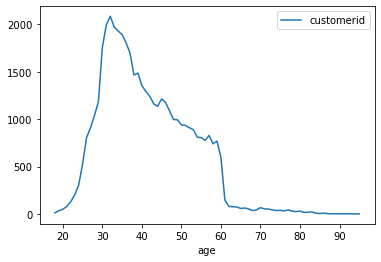

In [7]:
# Graficando la cantidad de veces que aparece cada edad entre las observaciones
data[["customerid", "age"]].groupby("age").count().plot()

##### Pequeño Ejercicio:

¿Cuál estrategia nos sirve más para tratar estos valores perdidos? ¿Eliminación o imputación?


--------------------
**¡Importante!**

La eliminación como estrategia de manejo de valores perdidos tiene las siguientes ventajas y desventajas:

* **Ventajas:**
    - **Elimina "ruido":** en ocasiones, los valores perdidos llevan a conclusiones erróneas cuando son tenidas en cuenta en el análisis o modelamiento.
    - **Resulta menos distorsionante que la imputación:** en ocasiones la imputación puede distorsionar altamente las bases de datos, ya que forza que una variable tenga un valor predeterminado por el o la analista. En dicha situación puede colarse el sesgo mismo de quien imputa.

* **Desventajas:**
    - **Reduce las observaciones:** en la mayoría de casos, esto no se puede realizar en bases de datos pequeñas, ya que cualquier pérdida de información es sumamente grave. Por ejemplo, en casos de enfermedades huérfanas (algunas cuentan con solo 10 casos a nivel mundial) la eliminación de datos puede ser supremamente perjudicial.
    - **Puede eliminar información importante escondida en la pérdida de datos:** en ocasiones, la pérdida de información ofrece también información. Es decir, en ocasiones que no exista un dato puede tener una causa que ayude a entender el problema. Por ejemplo, en encuestas es común encontrar valores perdidos en preguntas sobre género, lo que puede indicar que la persona encuestada no se siente cómoda con las opciones existentes o que no quiere decir su género dado que es no binario o disidente.
    
--------------------

Ahora miremos la variable `month`:

In [8]:
# Escriba aquí el código
data[data.month.isnull()].head(15)

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
189,190,31.0,100000,0,single,"management,tertiary",no,no,yes,no,unknown,5,NaN,562 sec,1,-1,0,unknown,no
769,770,39.0,20000,245,married,"blue-collar,primary",yes,no,yes,no,unknown,7,NaN,148 sec,3,-1,0,unknown,no
860,861,33.0,55000,165,married,"retired,secondary",yes,no,no,no,unknown,7,NaN,111 sec,1,-1,0,unknown,no
1267,1268,36.0,50000,114,married,"admin.,secondary",yes,no,yes,yes,unknown,8,NaN,147 sec,1,-1,0,unknown,no
1685,1686,34.0,20000,457,married,"blue-collar,secondary",yes,no,yes,no,unknown,9,NaN,266 sec,1,-1,0,unknown,no
1899,1900,49.0,16000,164,divorced,"housemaid,primary",yes,no,yes,no,unknown,9,NaN,1080 sec,5,-1,0,unknown,no
2433,2434,26.0,60000,3825,married,"technician,tertiary",yes,no,yes,no,unknown,13,NaN,107 sec,1,-1,0,unknown,no
2612,2613,38.0,50000,446,single,"admin.,unknown",no,no,yes,no,unknown,13,NaN,386 sec,1,-1,0,unknown,no
2747,2748,48.0,120000,2550,married,"entrepreneur,unknown",no,no,yes,no,unknown,14,NaN,175 sec,3,-1,0,unknown,no
3556,3557,41.0,20000,59,married,"blue-collar,secondary",yes,no,yes,no,unknown,15,NaN,75 sec,8,-1,0,unknown,no


Tampoco tenemos la suficiente información para saber qué hacer. Revisemos nuevamente su distribución:

In [9]:
# Contando la cantidad de veces que aparece cada mes entre las observaciones
data[["customerid", "month"]].groupby("month").count()

,customerid
month,
"apr, 2017",2931
"aug, 2017",6240
"dec, 2017",214
"feb, 2017",2646
"jan, 2017",1402
"jul, 2017",6888
"jun, 2017",5335
"mar, 2017",476
"may, 2017",13747


En este caso, tenemos algunas pistas. Por ejemplo, se puede observar que diciembre, marzo, octubre y septiembre tienen bajas observaciones. No obstante, resulta insuficiente para poder concluir si se puede imputar alguno de esos elementos en alguna proporción.

Solo por términos pedagógicos (y porque son pocos casos), imputaremos la moda en aquellos casos que tienen valores perdidos. Para ello tenemos dos formas, pero primero creemos una copia de los datos para probarlas ambas:

In [10]:
# Hacemos una copia de la base de datos
test = data.copy()

# Chequeamos los valores perdidos
test.isnull().sum()

customerid     0
age           20
salary         0
balance        0
marital        0
jobedu         0
targeted       0
default        0
housing        0
loan           0
contact        0
day            0
month         50
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
response      30
dtype: int64

* **Primera forma:** con un llamado condicional:

In [11]:
# Se reemplaza los casos de valores perdidos por la moda
test.loc[test.month.isnull()] = test.month.mode()[0]

# Chequeamos los valores perdidos
test.isnull().sum()

customerid     0
age           20
salary         0
balance        0
marital        0
jobedu         0
targeted       0
default        0
housing        0
loan           0
contact        0
day            0
month          0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
response      30
dtype: int64

* **Segunda forma:** con el método `fillna()`:

In [12]:
# Se encuentra la moda
mode = data.month.mode()[0]

# Se imputan los datos
data.month.fillna(mode, inplace = True)

# Chequeamos los valores perdidos
data.isnull().sum()

customerid     0
age           20
salary         0
balance        0
marital        0
jobedu         0
targeted       0
default        0
housing        0
loan           0
contact        0
day            0
month          0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
response      30
dtype: int64

----------------
**¡Importante**

La imputación como estrategia de manejo de valores perdidos tiene las siguientes ventajas y desventajas:

* **Ventajas:**
    - **Mantiene las observaciones:** mantiene el mayor número de observaciones posibles, tal que permite cumplir con requisitos sobre el tamaño de la muestra.
    - **Puede ser precisa en algunos casos:** con un buen análisis de los datos presentados y el fenómeno en cuestión, se puede inferir precisamente cuáles son los datos perdidos. Incluso, hasta modelos modernos de Machine Learning permiten obtener datos precisos al respecto.

* **Desventajas:**
     - **Genera "ruido":** en ocasiones, si se realiza mal el procedimiento, puede generar datos erróneos que deriven en conclusiones erróneas.
    - **Puede inducir el sesgo del analista:** en ocasiones la imputación puede distorsionar altamente las bases de datos, ya que forza que una variable tenga un valor predeterminado por el o la analista. En dicha situación puede colarse el sesgo mismo de quien imputa.
    
--------------------

### 1.2.1. Ejercicio

Analice y maneje los valores perdidos de la variable `response`.

## 1.3. Modificación de variables

Generalmente, el registro de variables en nuestras bases de datos no serán las que esperamos o las que nos son útiles. En ocasiones, tendremos que modificarlas para que podamos manejarlas de la manera que deseamos.

En esto se incluyen errores ortográficos, errores de digitación, entre otros

Miremos más detenidamente las variables `month` y `day`:

In [13]:
# Se seleccionan las columnas de interés
data[["day", "month"]]

,day,month
0,5,"may, 2017"
1,5,"may, 2017"
2,5,"may, 2017"
3,5,"may, 2017"
4,5,"may, 2017"
...,...,...
45206,17,"nov, 2017"
45207,17,"nov, 2017"
45208,17,"nov, 2017"
45209,17,"nov, 2017"


Como se puede observar, no representan una fecha exactamente. Por el contrario, combinan dos tipos de datos: `str` e `int`. Veamos esto con el método `dtypes` que nos indica los tipos de los datos:

In [14]:
# Se revisan los tipos de las columnas
data[["day", "month"]].dtypes

day       int64
month    object
dtype: object

Resultaría mucho más útil tener una sola columna del tipo `datetime`. Para ello, podemos realizar el siguiente proceso con el método `str.split()`:

In [15]:
# Se separan el mes y el año
data[["month", "year"]] = data["month"].str.split(",", expand = True)

# Se revisan los datos
data.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,year
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,may,261 sec,1,-1,0,unknown,no,2017
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,may,151 sec,1,-1,0,unknown,no,2017
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,may,76 sec,1,-1,0,unknown,no,2017
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,may,92 sec,1,-1,0,unknown,no,2017
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,may,198 sec,1,-1,0,unknown,no,2017


Ahora, tenemos el día, el mes y el año en diferentes columnas. Sería de mayor utilidad tenerla en una sola:

In [16]:
# Se combinan las tres columnas como una cadena de texto
data["date"] = data.day.astype(str) + "/" + data.month + "/" + data.year

# Removiendo un espacio
data.date = data.date.str.replace(' ', '') 

# Convirtiendo la columna en un datetime
data.date = pd.to_datetime(data.date)

# Revisando la columna de la fecha
data.dtypes

customerid             int64
age                  float64
salary                 int64
balance                int64
marital               object
jobedu                object
targeted              object
default               object
housing               object
loan                  object
contact               object
day                    int64
month                 object
duration              object
campaign               int64
pdays                  int64
previous               int64
poutcome              object
response              object
year                  object
date          datetime64[ns]
dtype: object

### 1.3.1. Ejercicio

Convierta la variable `jobedu` en dos columnas diferentes.